# **Evento Análise Exploratória de Dados**


Esse notebook faz parte do evento Análise Exploratória de Dados organizado pela [AI Inclusive](ai-inclusive.org).

Iremos utilizar um dataset muito bacana que fala sobre como anda a felicidade pelo mundo. Já pensou em analisar esse tipo de dado? Queremos mostrar como pode e é divertido fazer análise de dados. Para esse evento resolvemos começar pelo simples para abraçar todas as pessoas, principalmente aquelas que estão começando na área.



---------------------------------
## **Contexto**
O Relatório de Felicidade Mundial é uma pesquisa histórica sobre o estado de felicidade global. **O relatório continua ganhando reconhecimento global à medida que governos, organizações e sociedade civil usam cada vez mais indicadores de felicidade para informar suas decisões de formulação de políticas**. Os principais especialistas em todos os campos - economia, psicologia, análise de pesquisas, estatísticas nacionais, saúde, políticas públicas e muito mais - descrevem como as medições de felicidade.

As pontuações e classificações de felicidade usam dados da Gallup World Poll. As colunas após a pontuação de felicidade estimam até que ponto cada um dos seis fatores - produção econômica, suporte social, expectativa de vida, liberdade, ausência de corrupção e generosidade - contribui para tornar as avaliações de vida mais altas em cada país do que na Distopia, a país hipotético com valores iguais às médias nacionais mais baixas do mundo para cada um dos seis fatores. Eles não têm impacto sobre a pontuação total relatada para cada país, mas explicam por que alguns países têm uma classificação mais elevada do que outros.



**Fonte:**  [Dataset Kaggle](https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021)

**Leia o relatório completo aqui:**
[World Happiness Report 2021](https://happiness-report.s3.amazonaws.com/2021/WHR+21.pdf)

**Perguntas Frequentes:** [World Happiness FAQ](https://worldhappiness.report/faq/)

<!--https://www.kaggle.com/kanncaa1/world-happiness-expanatory-data-analysis-->

<p align="center">
  <img src="https://media.giphy.com/media/l46Cy1rHbQ92uuLXa/giphy.gif" alt="GIF Análise de Dados"/>
</p>

## **Dicionário dos dados**

As colunas de pontuação de felicidade estimam até que ponto cada um dos seis fatores - **produção econômica, suporte social, expectativa de vida, liberdade, ausência de corrupção e generosidade** - contribui para tornar as avaliações de vida mais altas em cada país.

| Descrição das colunas    |  |
|--------------------------|--|
**```Country name:```** Nome do país  
**```Regional indicator:```**  Região a qual o país pertence                        
**```Ladder score:```** Pontuação de felicidade ou bem-estar subjetivo. Esta é a resposta média nacional à questão das avaliações de vida.                               
**```Standard error of ladder score:```** Erro padrão do ```Ladder score```             
**```upperwhisker:```**  Limite superior                              
**```lowerwhisker:```**  Limite inferior                              
**```Logged GDP per capita:```** A série temporal do PIB per capita de 2019 a 2020 usando previsões específicas de cada país do crescimento real do PIB em 2020.                        
**```Social support:```**  Apoio social refere-se à assistência ou suporte fornecido por membros de redes sociais a um indivíduo.                              
**```Healthy life expectancy:```** Expectativa de vida saudável é a média de vida com boa saúde - ou seja, sem limitação irreversível da atividade cotidiana ou incapacidades - de uma geração fictícia sujeita às condições de mortalidade e morbidade vigentes naquele ano.                      
**```Freedom to make life choices:```** Liberdade para fazer escolhas de vida é a média nacional de respostas binárias à pergunta do GWP "Você está satisfeito ou insatisfeito com sua liberdade de escolher o que fazer com sua vida?" ... É definida como a média de risos e alegria por outras ondas onde a questão da felicidade não foi feita.                 
**```Generosity:```** A generosidade é o resíduo da regressão da média nacional de resposta à pergunta do GWP "Você doou dinheiro para uma instituição de caridade no mês passado?" no PIB per capita.                                   
**```Perceptions of corruption:```** A medida é a média nacional das respostas da pesquisa a duas perguntas do GWP: “A corrupção está disseminada por todo o governo ou não” e “A corrupção está disseminada dentro das empresas ou não?”                   
**```Ladder score in Dystopia:```** Tem valores iguais às médias nacionais mais baixas do mundo. Distopia como uma referência para comparar as contribuições de cada um dos seis fatores. A distopia é um país imaginário que tem as pessoas menos felizes do mundo. 
Visto que a vida seria muito desagradável em um país com os rendimentos mais baixos do mundo, expectativa de vida mais baixa, mais baixa generosidade, mais corrupção, menos liberdade e menos apoio social, é referido como "Distopia", em contraste com Utopia.                   
  

Conheça mais sobre o Opendatasets [nesse link](https://pypi.org/project/opendatasets/)

In [29]:
#instalando as bibliotecas
!pip install opendatasets
!pip install plotly

In [30]:
#importando as bibliotecas 
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly 
import plotly.express as px

#configurando o estilo dos gráficos seaborn
sns.set_style('darkgrid')

In [31]:
#fazendo o download do dataset
od.download("https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021")

Skipping, found downloaded files in "./world-happiness-report-2021" (use force=True to force download)


In [32]:
#lendo os dados
df = pd.read_csv('world-happiness-report-2021/world-happiness-report-2021.csv')

In [33]:
#visualizando as 5 primeiras linhas
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [34]:
# dimensões do df
print('DIMENSÕES DO DATAFRAME:')
print(f'Linhas:  {df.shape[0]}')
print(f'Colunas:  {df.shape[1]}')

DIMENSÕES DO DATAFRAME:
Linhas:  149
Colunas:  20


In [35]:
#informações básicas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

**Quantas variáveis nós temos para cada tipo de dado?**  

In [36]:
df.dtypes.value_counts()

float64    18
object      2
dtype: int64

**Existem algumas colunas que não vamos usar, então vamos descartá-las e concentrar nossos esforços nas demais colunas**  

In [37]:
drop_list = ['Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
             'Explained by: Log GDP per capita', 'Explained by: Social support',
             'Explained by: Healthy life expectancy',
             'Explained by: Freedom to make life choices', 'Explained by: Generosity',
             'Explained by: Perceptions of corruption', 'Dystopia + residual', 'Ladder score in Dystopia']
df.drop(columns=drop_list, inplace=True)

In [38]:
#descrição das estatísticas básicas das colunas
df.describe()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450
std,1.073924,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226
min,2.523000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000
25%,4.852000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000
50%,5.534000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000
75%,6.255000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000
max,7.842000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000


In [39]:
#verificando a existência de dados nulos
df.isna()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
144,False,False,False,False,False,False,False,False,False
145,False,False,False,False,False,False,False,False,False
146,False,False,False,False,False,False,False,False,False
147,False,False,False,False,False,False,False,False,False


In [40]:
df.isna().sum()

Country name                    0
Regional indicator              0
Ladder score                    0
Logged GDP per capita           0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

**Quantos países temos na nossa base?** 

In [41]:
df['Country name'].nunique()

149

**Quais são esses países?**  

In [42]:
df['Country name'].unique()

array(['Finland', 'Denmark', 'Switzerland', 'Iceland', 'Netherlands',
       'Norway', 'Sweden', 'Luxembourg', 'New Zealand', 'Austria',
       'Australia', 'Israel', 'Germany', 'Canada', 'Ireland',
       'Costa Rica', 'United Kingdom', 'Czech Republic', 'United States',
       'Belgium', 'France', 'Bahrain', 'Malta',
       'Taiwan Province of China', 'United Arab Emirates', 'Saudi Arabia',
       'Spain', 'Italy', 'Slovenia', 'Guatemala', 'Uruguay', 'Singapore',
       'Kosovo', 'Slovakia', 'Brazil', 'Mexico', 'Jamaica', 'Lithuania',
       'Cyprus', 'Estonia', 'Panama', 'Uzbekistan', 'Chile', 'Poland',
       'Kazakhstan', 'Romania', 'Kuwait', 'Serbia', 'El Salvador',
       'Mauritius', 'Latvia', 'Colombia', 'Hungary', 'Thailand',
       'Nicaragua', 'Japan', 'Argentina', 'Portugal', 'Honduras',
       'Croatia', 'Philippines', 'South Korea', 'Peru',
       'Bosnia and Herzegovina', 'Moldova', 'Ecuador', 'Kyrgyzstan',
       'Greece', 'Bolivia', 'Mongolia', 'Paraguay', 'Montenegro

**Vamos achar o Brasil?**

In [43]:
df[df['Country name'] == 'Brazil']

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
34,Brazil,Latin America and Caribbean,6.33,9.577,0.882,66.601,0.804,-0.071,0.756


**Quais são as regiões que temos na nossa base?**  

In [44]:
df['Regional indicator'].unique()

array(['Western Europe', 'North America and ANZ',
       'Middle East and North Africa', 'Latin America and Caribbean',
       'Central and Eastern Europe', 'East Asia', 'Southeast Asia',
       'Commonwealth of Independent States', 'Sub-Saharan Africa',
       'South Asia'], dtype=object)

**Vamos ver o top 10 países com maior Ladder score**  

In [45]:
df[['Country name', 'Ladder score']].sort_values(by='Ladder score', ascending=False).head(10)

,Country name,Ladder score
0,Finland,7.842
1,Denmark,7.620
2,Switzerland,7.571
3,Iceland,7.554
4,Netherlands,7.464
5,Norway,7.392
6,Sweden,7.363
7,Luxembourg,7.324
8,New Zealand,7.277
9,Austria,7.268


**Vamos ver o top 10 regiões com maior média Ladder score**  

In [46]:
df.groupby(['Regional indicator']).agg({'Ladder score': 'mean'}).sort_values(by='Ladder score', ascending=False).head(10)

,Ladder score
Regional indicator,
North America and ANZ,7.128500
Western Europe,6.914905
Central and Eastern Europe,5.984765
Latin America and Caribbean,5.908050
East Asia,5.810333
Commonwealth of Independent States,5.467000
Southeast Asia,5.407556
Middle East and North Africa,5.219765
Sub-Saharan Africa,4.494472


**Top 10 países com maior índice de Social support**  

In [47]:
df[['Country name', 'Social support']].sort_values(by='Social support', ascending=False).head(10)

,Country name,Social support
3,Iceland,0.983
96,Turkmenistan,0.983
0,Finland,0.954
5,Norway,0.954
1,Denmark,0.954
44,Kazakhstan,0.952
28,Slovenia,0.948
8,New Zealand,0.948
14,Ireland,0.947
17,Czech Republic,0.947


**E o oposto... O top 10 países com menor índice de Social support**  

In [48]:
df[['Country name', 'Social support']].sort_values(by='Social support', ascending=False).tail(10)

,Country name,Social support
127,Chad,0.619
138,India,0.603
135,Togo,0.569
105,Morocco,0.560
146,Rwanda,0.552
142,Haiti,0.540
143,Malawi,0.537
139,Burundi,0.490
98,Benin,0.489
148,Afghanistan,0.463


**Top 10 países com maior índice de Generosity**  

In [49]:
df[['Country name', 'Generosity']].sort_values(by='Generosity', ascending=False).head(10)

,Country name,Generosity
81,Indonesia,0.542
125,Myanmar,0.509
97,Gambia,0.424
142,Haiti,0.422
41,Uzbekistan,0.311
53,Thailand,0.287
120,Kenya,0.287
96,Turkmenistan,0.273
32,Kosovo,0.257
16,United Kingdom,0.233


**Ranking de países com maior indíce de Generosity**  

In [50]:
ranking_generosity = df[['Country name', 'Generosity']].sort_values(by='Generosity').reset_index(drop=True)
ranking_generosity

,Country name,Generosity
0,Greece,-0.288
1,Japan,-0.258
2,Botswana,-0.246
3,Portugal,-0.244
4,Georgia,-0.238
...,...,...
144,Uzbekistan,0.311
145,Haiti,0.422
146,Gambia,0.424
147,Myanmar,0.509


**O Brasil está em qual posição nesse ranking?**  

Brasil está na 59º posição

In [51]:
ranking_generosity[ranking_generosity['Country name'] == 'Brazil']

,Country name,Generosity
60,Brazil,-0.071


**Vamos filtrar apenas a região 'Latin America and Caribbean' para fazer uma análise mais direcionada**  

In [52]:
latin_america_caribbean = df[df['Regional indicator']=='Latin America and Caribbean']
latin_america_caribbean.head()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
15,Costa Rica,Latin America and Caribbean,7.069,9.880,0.891,71.400,0.934,-0.126,0.809
29,Guatemala,Latin America and Caribbean,6.435,9.053,0.813,64.958,0.906,-0.038,0.775
30,Uruguay,Latin America and Caribbean,6.431,9.966,0.925,69.100,0.896,-0.092,0.590
34,Brazil,Latin America and Caribbean,6.330,9.577,0.882,66.601,0.804,-0.071,0.756
35,Mexico,Latin America and Caribbean,6.317,9.859,0.831,68.597,0.862,-0.147,0.799


**Vamos construir alguns gráficos para enriquecer nossa análise e nos comunicarmos melhor**  

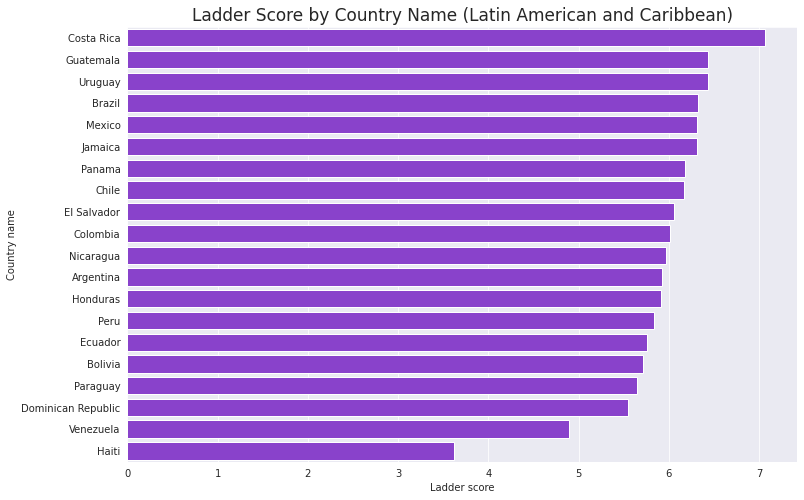

In [53]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Ladder score', 
            y='Country name', 
            data=latin_america_caribbean, 
            orient='h',
            color='blueviolet',
            order=latin_america_caribbean.sort_values('Ladder score', ascending=False)['Country name'])
ax.set_title('Ladder Score by Country Name (Latin American and Caribbean)', fontsize=17);

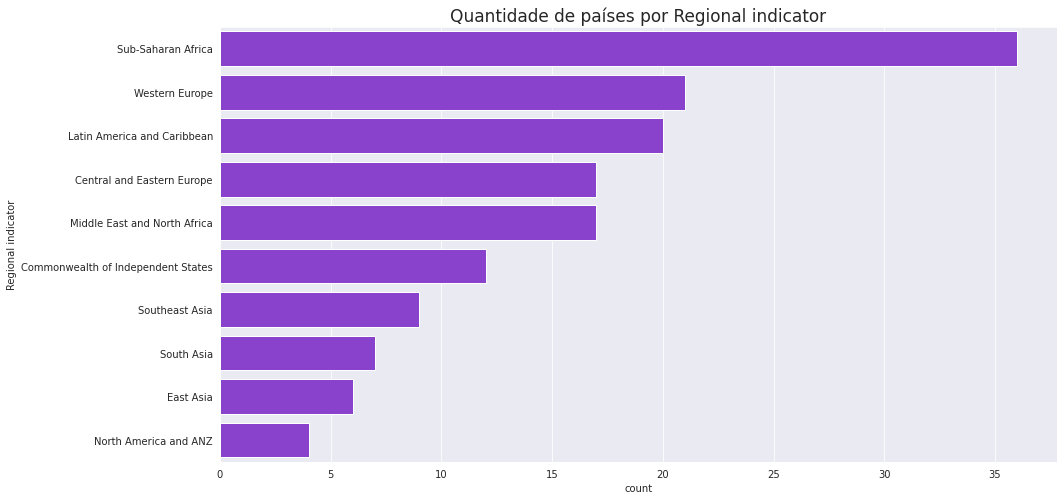

In [54]:
plt.figure(figsize=(15,8))
ax = sns.countplot(y ='Regional indicator',
                   data=df,
                   color='blueviolet',
                   order=df['Regional indicator'].value_counts().index)
ax.set_title('Quantidade de países por Regional indicator', fontsize=17);

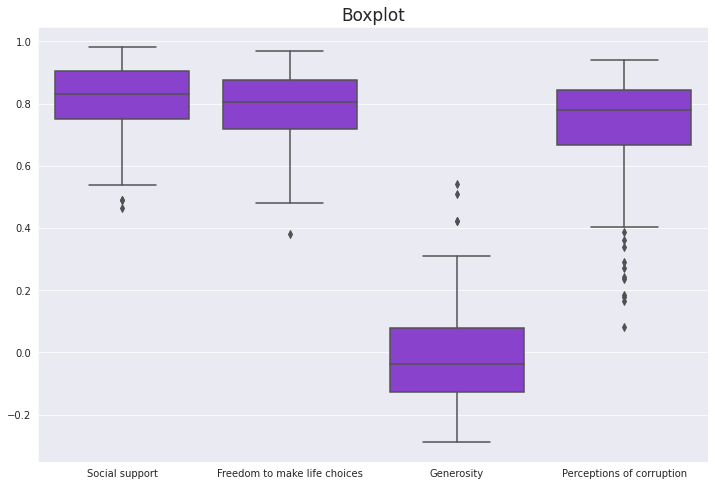

In [55]:
regional_list = ['Social support', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

plt.figure(figsize=(12,8))
ax = sns.boxplot(data = df.loc[:, regional_list], orient = 'v', color='blueviolet')
ax.set_title('Boxplot', fontsize=17);

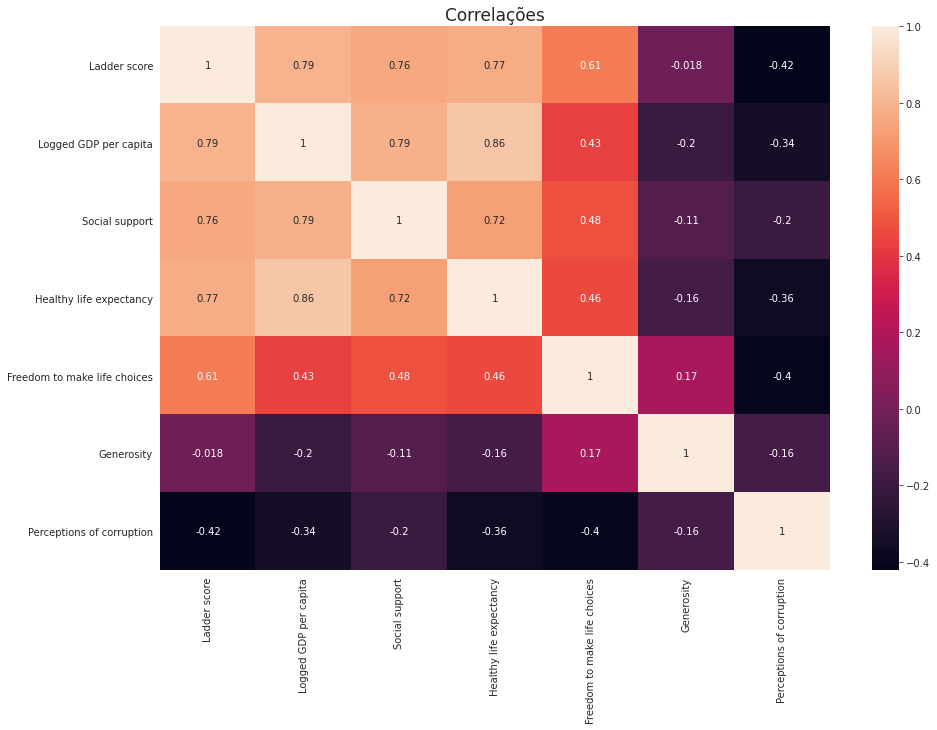

In [56]:
plt.figure(figsize=(15, 10))
ax = sns.heatmap(df.corr(), annot=True)
ax.set_title('Correlações', fontsize=17);

In [58]:
fig = px.choropleth(df, 
                    locations='Country name', 
                    locationmode='country names',
                    color='Ladder score',
                    title='Pontuação de felicidade no mundo')
fig.show()